In [1]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
%matplotlib inline
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0


In [2]:
from DALI_lattice import *
#Change RF parameters
phi=-3.5
LA1RC1.phi=phi; LA1RC2.phi=phi; LA2RC1.phi=phi; LA2RC1.phi=phi


0.7853981633974483 0.23561944901923448 0.19634954084936207
0.2617993877991494


In [3]:
# initialization of Twiss object
tws0 = Twiss()
tws0.E       = 0.0055933376
tws0.emit_x  = 7.365138174912308e-07
tws0.emit_y  = 7.534879456221737e-07
tws0.beta_x  = 14.536983646893802
tws0.beta_y  = 14.193144329608034
tws0.alpha_x = 5.668202451983896
tws0.alpha_y = 5.532646004350875
tws0.gamma_x = 2.278912864000848
tws0.gamma_y = 2.2271436882043365


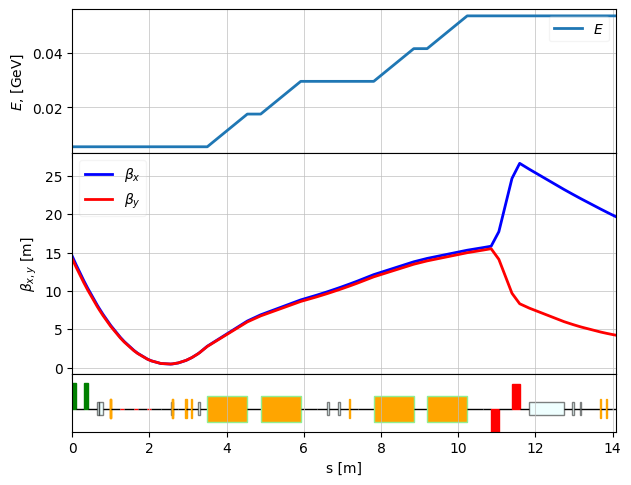

In [4]:
# Optics presntation 
# Optics presntation 
lat_to_MIR2 = MagneticLattice(T02T1)
twsSIR= twiss(lat_to_MIR2,tws0 )
plot_opt_func(lat_to_MIR2, twsSIR, top_plot = ["E"], legend=False, font_size=10)
plt.show()

z = 14.094 / 14.094. Applied: SpaceChargeSpaceChargeeee
 time exec: 285.28016805648804 sec


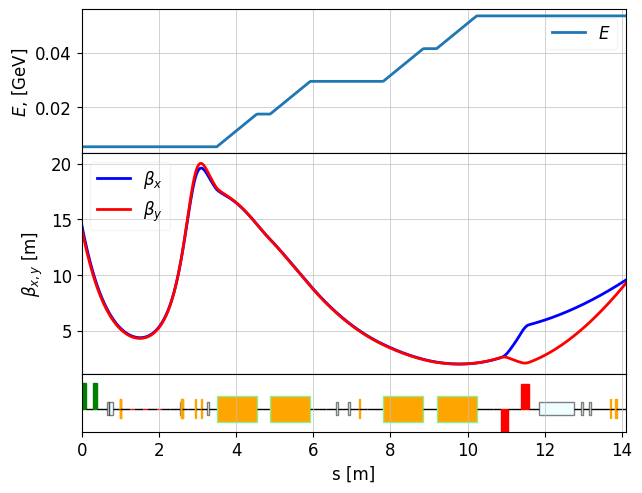

In [5]:
p_array_init = load_particle_array("p_array.npz")
method = {"global": SecondTM}
lat_DALI_Linac = MagneticLattice(T02T1,method=method) 
# Initializing SpaceCharge
sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc3 = SpaceCharge()
sc3.nmesh_xyz = [63, 63, 63]
sc3.step = 3

navi = Navigator(lat_DALI_Linac)
navi.unit_step = 0.01
# add physics processes from the first element to the last of the lattice
navi.add_physics_proc(sc1, START1I, enter_Linac1)
navi.add_physics_proc(sc3, enter_Linac1, lat_DALI_Linac.sequence[-1])

# definiing of unit step in [m]
p_array = deepcopy(p_array_init)
start = time.time()
start = time.time()
tws_Linac_track, p_Linac_array = track(lat_DALI_Linac, p_array, navi)
print("\n time exec:", time.time() - start, "sec")
plot_opt_func(lat_DALI_Linac, tws_Linac_track, top_plot=["E"],fig_name=0, legend=False)
plt.show()

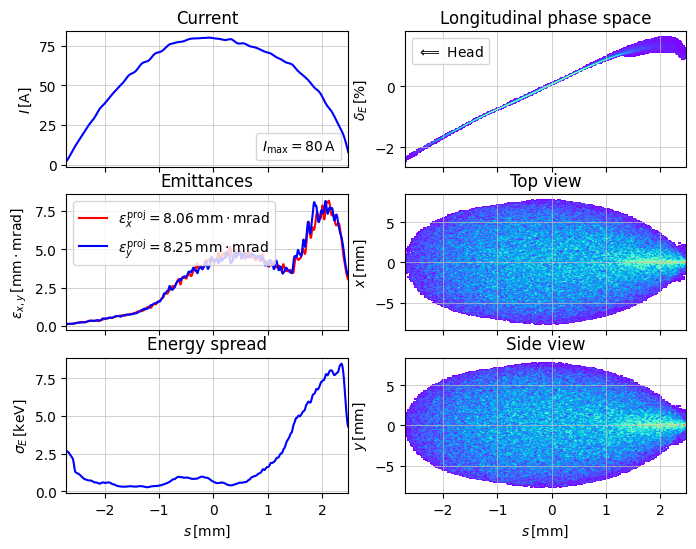

In [6]:
show_e_beam(p_array_init, figsize=(8,6))
plt.show()

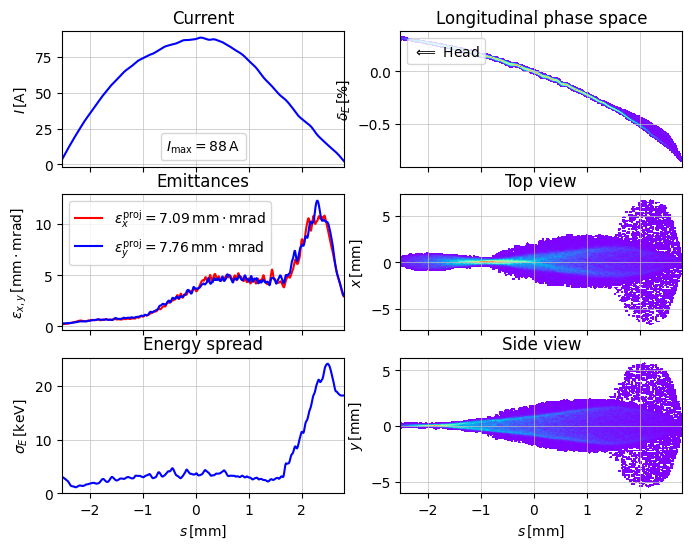

In [7]:
show_e_beam(p_Linac_array, figsize=(8,6))
plt.show()
save_particle_array("tracking_beam_Linac.npz", p_Linac_array)
save_particle_array("tracking_beam_Inj.npz", p_array_init)

z = 8.885 / 8.885000000000003. Applied: 3. Applied: SpaceChargeee
 time exec: 76.12548565864563 sec


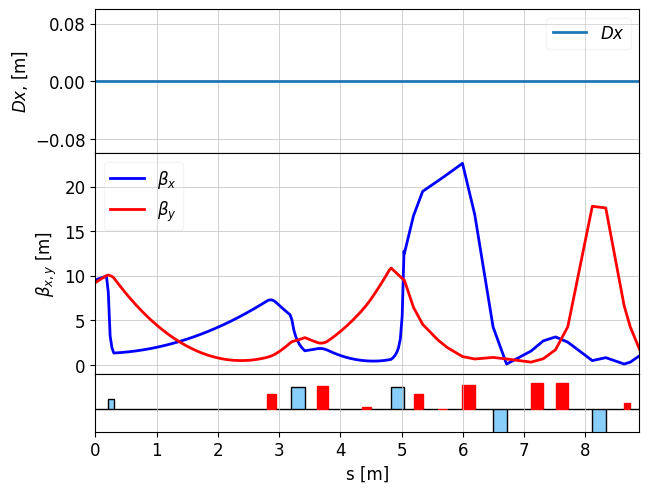

In [8]:
method = {"global": SecondTM}
lat_DALI_MIR = MagneticLattice(latcell_to_MIR,start=ExitT1, stop=None, method=method) 
# Initializing SpaceCharge

#p_array_init = load_particle_array("tracking_beam_Linac.npz")

navi = Navigator(lat_DALI_MIR)
navi.unit_step = 0.01
sc3 = SpaceCharge()
sc3.nmesh_xyz = [63, 63, 63]
sc3.step = 3

# add physics processes from the first element to the last of the lattice

navi.add_physics_proc(sc3, lat_DALI_MIR.sequence[0], lat_DALI_MIR.sequence[-1])

# definiing of unit step in [m]
p_array = deepcopy(p_Linac_array)
#p_array = deepcopy(p_array_init)
start = time.time()

tws_MIR_track, p_MIR_array = track(lat_DALI_MIR, p_array, navi)
print("\n time exec:", time.time() - start, "sec")
plot_opt_func(lat_DALI_MIR, tws_MIR_track,fig_name=0, legend=False)
plt.show()

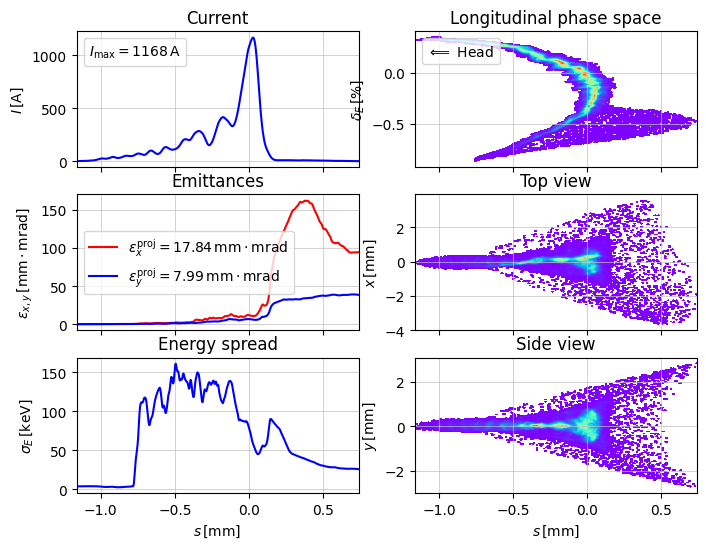

In [9]:
show_e_beam(p_MIR_array, figsize=(8,6))
plt.show()
save_particle_array("tracking_beam_MRI.npz", p_MIR_array)


In [10]:
[1, 2, 3]+[1,2]

[1, 2, 3, 1, 2]